In [3]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from scipy.stats import mannwhitneyu,kruskal,ttest_ind,f_oneway
#import pickle
#import kaleido
import plotly.io as pio
pio.kaleido.scope.default_format = "pdf"
import plotly.express as px
from matplotlib.colors import ListedColormap
import matplotlib.colors as mc
import matplotlib.pyplot as plt
#import scikit_posthocs as sp
import itertools
import seaborn as sns

In [4]:
data = pd.read_csv('data/TAD_ChIP_strength_fpkm_size_E1_interaction_twoborerexpression_innerfpkm.tsv',sep='\t')
# p1_tad = pd.read_csv('/home/data4/jh/data/projects/2020/aggregate/data/explain/Agglo_Cluster1.tsv', sep='\t')
# p2_tad = pd.read_csv('/home/data4/jh/data/projects/2020/aggregate/data/explain/Agglo_Cluster2.tsv', sep='\t')
# p3_tad = pd.read_csv('/home/data4/jh/data/projects/2020/aggregate/data/explain/Agglo_Cluster3.tsv', sep='\t')
#fpkm = pd.read_csv('../RNA-seq/TADs_fpkm.tsv',sep='\t')

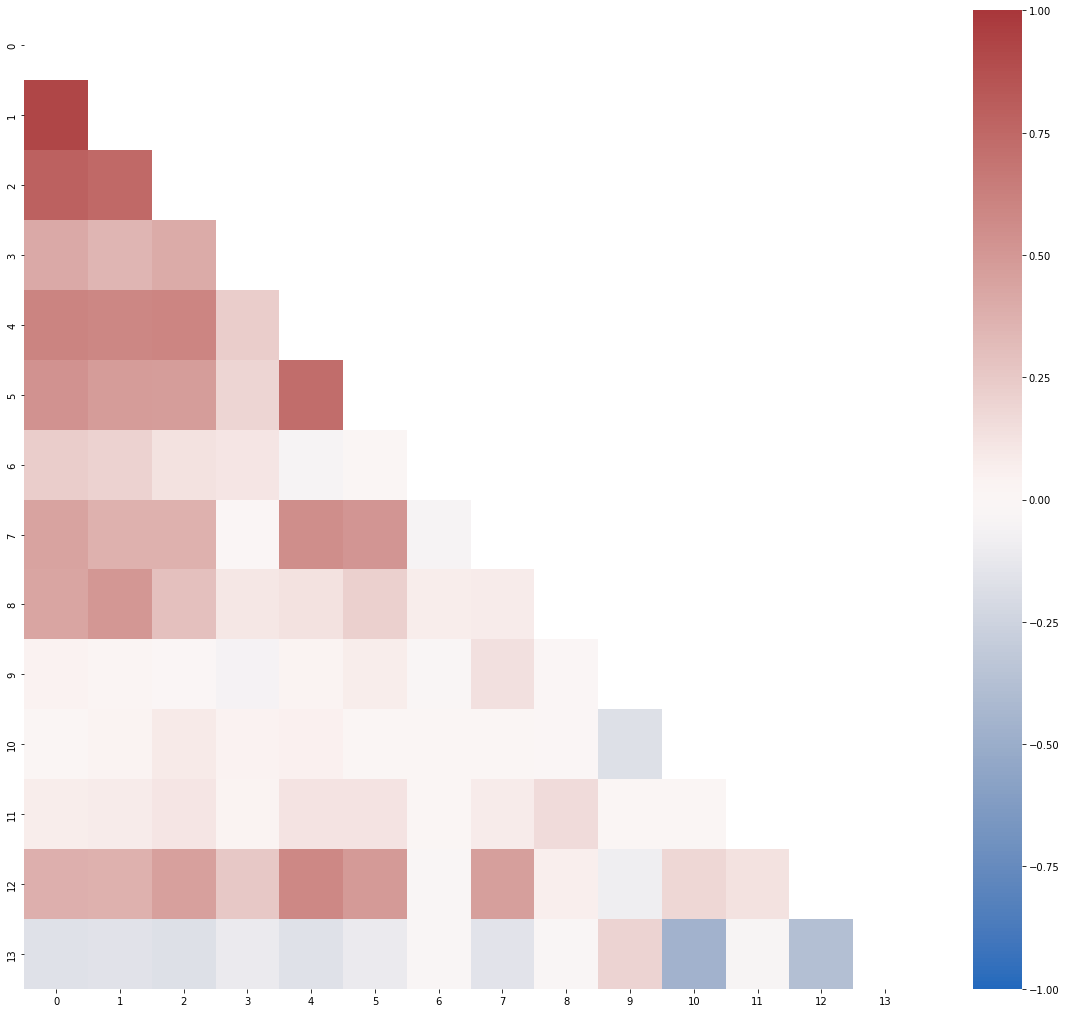

In [6]:
#data_fpkm = pd.merge(data,fpkm,how='inner',on=['chrom','start','end'])
cols = ['POU5F1_RPKM','NANOG_RPKM','CTCF_RPKM','H3K27me3_RPKM','H3K4me1_RPKM','H3K4me3_RPKM','H3K9me3_RPKM','H3K36me3_RPKM','border_fpkm','strength','interaction','inner_fpkm','E1','size']
def normalize_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))  
data_num = data[cols].apply(lambda x : pd.to_numeric(x,errors='coerce'))
data_full = data_num[~np.isnan(data_num).any(axis=1)]
data_m = np.apply_along_axis(normalize_data,0,data_full)
data_m_corr = np.corrcoef(data_m,rowvar=False)

#data_fpkm_corr = data_fpkm.drop(['chrom','start','end'],axis=1).corr()
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap = 'vlag'
import seaborn as sns
mask = np.triu(np.ones_like(data_m_corr, dtype=bool))
fig, ax = plt.subplots(figsize=(20,18))
sns.heatmap(data_m_corr, mask=mask, cmap=cmap,vmin=-1,vmax=1)
#fig.set_size_inches(18, 20)
plt.savefig('results/corr_norm_all.pdf',bbox_inches='tight')

In [12]:
data_m_corr

array([[1.        , 0.65188439, 0.51051604, ..., 0.30409308, 0.58013374,
        0.41395492],
       [0.65188439, 1.        , 0.68164698, ..., 0.56799113, 0.48773299,
        0.41494456],
       [0.51051604, 0.68164698, 1.        , ..., 0.5323918 , 0.8136923 ,
        0.45371322],
       ...,
       [0.30409308, 0.56799113, 0.5323918 , ..., 1.        , 0.66692932,
        0.83879712],
       [0.58013374, 0.48773299, 0.8136923 , ..., 0.66692932, 1.        ,
        0.77707844],
       [0.41395492, 0.41494456, 0.45371322, ..., 0.83879712, 0.77707844,
        1.        ]])

In [7]:
c1 = pd.concat([c11_tad,c12_tad,c13_tad])
c2 = pd.concat([c21_tad,c22_tad,c23_tad])

In [12]:
def merge_tad(x,y):
    return pd.merge(x,y,how='inner',on=['chrom','start','end'])
data_type = list(map(merge_tad,itertools.repeat(data,3),[p1_tad,p2_tad,p3_tad]))
data_type_fpkm = list(map(merge_tad,itertools.repeat(fpkm,3),data_type))

In [18]:
c_fpkm = pd.DataFrame()
c_fpkm['Expression(FPKM)'] = data_type_fpkm[0]['fpkm'].tolist()+data_type_fpkm[1]['fpkm'].tolist()+data_type_fpkm[2]['fpkm'].tolist()
c_fpkm['Type'] = ['Type1']*len(data_type_fpkm[0].index)+['Type2']*len(data_type_fpkm[1].index)+['Type3']*len(data_type_fpkm[2].index)

/home/data4/jh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "family" which is no longer supported as of 3.3 and will become an error two minor releases later



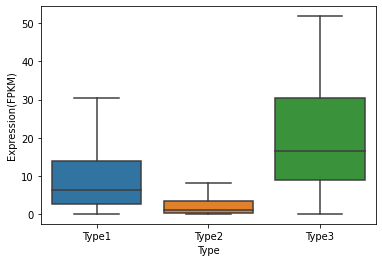

In [20]:
c_fpkm['Expression(FPKM)']=pd.to_numeric(c_fpkm['Expression(FPKM)'],errors='coerce')
# import seaborn as sns
# import matplotlib.pyplot as plt
sns.boxplot(x='Type',y='Expression(FPKM)',data=c_fpkm,showfliers=False)
plt.savefig('withintadexpression_3P.pdf',bbox_inches='tight',family='sans')

/home/data4/jh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "family" which is no longer supported as of 3.3 and will become an error two minor releases later



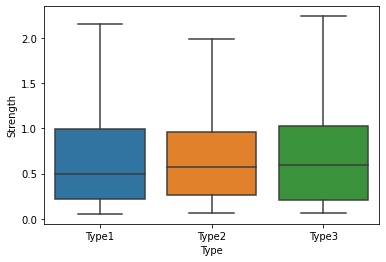

In [26]:
c_strength = pd.DataFrame()
c_strength['Strength'] = data_type_fpkm[0]['strength'].tolist()+data_type_fpkm[1]['strength'].tolist()+data_type_fpkm[2]['strength'].tolist()
c_strength['Type'] = ['Type1']*len(data_type_fpkm[0].index)+['Type2']*len(data_type_fpkm[1].index)+['Type3']*len(data_type_fpkm[2].index)
c_strength['Strength']=pd.to_numeric(c_strength['Strength'],errors='coerce')
sns.boxplot(x='Type',y='Strength',data=c_strength,showfliers=False)
plt.savefig('boundary_strength_3P.pdf',bbox_inches='tight',family='sans')

/home/data4/jh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "family" which is no longer supported as of 3.3 and will become an error two minor releases later



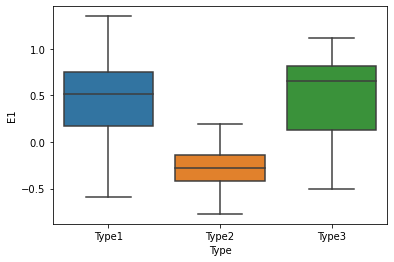

In [28]:
c_strength = pd.DataFrame()
c_strength['E1'] = data_type_fpkm[0]['E1'].tolist()+data_type_fpkm[1]['E1'].tolist()+data_type_fpkm[2]['E1'].tolist()
c_strength['Type'] = ['Type1']*len(data_type_fpkm[0].index)+['Type2']*len(data_type_fpkm[1].index)+['Type3']*len(data_type_fpkm[2].index)
c_strength['E1']=pd.to_numeric(c_strength['E1'],errors='coerce')
sns.boxplot(x='Type',y='E1',data=c_strength,showfliers=False)
plt.savefig('E1_3P.pdf',bbox_inches='tight',family='sans')

/home/data4/jh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "family" which is no longer supported as of 3.3 and will become an error two minor releases later



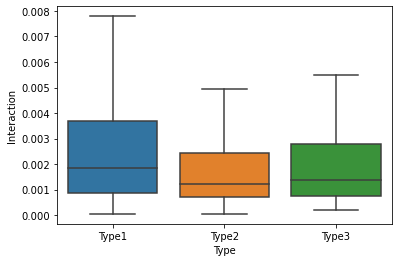

In [31]:
c_strength = pd.DataFrame()
c_strength['Interaction'] = data_type_fpkm[0]['interaction'].tolist()+data_type_fpkm[1]['interaction'].tolist()+data_type_fpkm[2]['interaction'].tolist()
c_strength['Type'] = ['Type1']*len(data_type_fpkm[0].index)+['Type2']*len(data_type_fpkm[1].index)+['Type3']*len(data_type_fpkm[2].index)
c_strength['Interaction']=pd.to_numeric(c_strength['Interaction'],errors='coerce')
sns.boxplot(x='Type',y='Interaction',data=c_strength,showfliers=False)
plt.savefig('interaction_3P.pdf',bbox_inches='tight',family='sans')

/home/data4/jh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "family" which is no longer supported as of 3.3 and will become an error two minor releases later



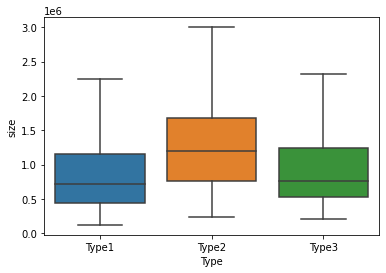

In [33]:
c_strength = pd.DataFrame()
c_strength['size'] = data_type_fpkm[0]['size'].tolist()+data_type_fpkm[1]['size'].tolist()+data_type_fpkm[2]['size'].tolist()
c_strength['Type'] = ['Type1']*len(data_type_fpkm[0].index)+['Type2']*len(data_type_fpkm[1].index)+['Type3']*len(data_type_fpkm[2].index)
c_strength['size']=pd.to_numeric(c_strength['size'],errors='coerce')
sns.boxplot(x='Type',y='size',data=c_strength,showfliers=False)
plt.savefig('size_3P.pdf',bbox_inches='tight',family='sans')

/home/data4/jh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "family" which is no longer supported as of 3.3 and will become an error two minor releases later



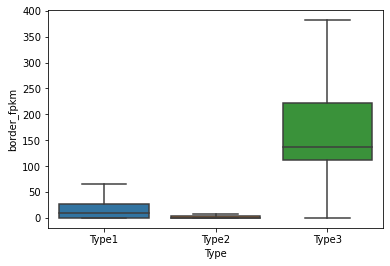

In [36]:
c_strength = pd.DataFrame()
c_strength['border_fpkm'] = data_type_fpkm[0]['border_fpkm'].tolist()+data_type_fpkm[1]['border_fpkm'].tolist()+data_type_fpkm[2]['border_fpkm'].tolist()
c_strength['Type'] = ['Type1']*len(data_type_fpkm[0].index)+['Type2']*len(data_type_fpkm[1].index)+['Type3']*len(data_type_fpkm[2].index)
c_strength['border_fpkm']=pd.to_numeric(c_strength['border_fpkm'],errors='coerce')
sns.boxplot(x='Type',y='border_fpkm',data=c_strength,showfliers=False)
plt.savefig('expression_on_borders_3P.pdf',bbox_inches='tight',family='sans')

In [5]:
print(len(state1.index)/200,len(state2.index)/200,len(state3.index)/200)

1478.0 1031.0 218.0


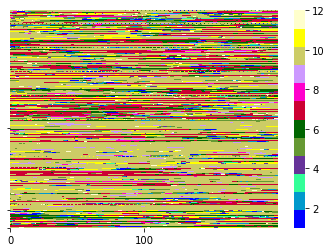

In [3]:
state2 = pd.read_csv('./cluster1/Agglo_C2_borders_states.bed',sep='\t',header=None)
state1 = pd.read_csv('./cluster1/Agglo_C1_borders_states.bed',sep='\t',header=None)
state3 = pd.read_csv('./cluster1/Agglo_C3_borders_states.bed',sep='\t',header=None)
state = pd.concat([state1,state2,state3])
stateM = state.iloc[:,3].to_numpy().reshape(int(len(state.index)/200),200)
def toIM(s):
    return int(s.strip('E'))
vIM = np.vectorize(toIM)
intstateM=vIM(stateM)
stateMplot = sns.heatmap(intstateM,cmap=ListedColormap([(0,0,1),(0,0.6,0.8),(0.2,1,0.6),(0.4,0.2,0.6), (0.4,0.6,0.2),(0,0.4,0),(0.8,0,0.2),(1,0,0.8), (0.8,0.6,1),(0.8,0.8,0.4),(1,1,0),(1,1,0.8)]),xticklabels=100,yticklabels=['Type3','Type2','Type1'])
stateMplot.set_yticks([1478-1,1478+1031-1,1478+1031+218-1])
stateMplot.get_figure().savefig('state_Cluster_3P.pdf',bbox_inches='tight')

In [10]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=data_type_fpkm[0]['fpkm'],
    name="Type 1",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all' # represent all points
#     marker_color='rgb(7,40,89)',
#     line_color='rgb(7,40,89)'
))

fig.add_trace(go.Box(
    y=data_type_fpkm[1]['fpkm'],
    name="Type 2",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', 
#     marker_color='rgb(9,56,125)',
#     line_color='rgb(9,56,125)'
))

fig.add_trace(go.Box(
    y=data_type_fpkm[2]['fpkm'],
    name="Type 3",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', 
#     marker_color='rgb(8,81,156)',
#     line_color='rgb(8,81,156)'
))

# fig.add_trace(go.Box(
#     y=data_type_fpkm[3]['fpkm'],
#     name="P4",
#     jitter=0.3,
#     pointpos=-1.8,
#     boxpoints='all', 
# #     marker_color='rgb(107,174,214)',
# #     line_color='rgb(107,174,214)'
# ))

# fig.add_trace(go.Box(
#     y=data_type_fpkm[4]['fpkm'],
#     name="P5",
#     jitter=0.3,
#     pointpos=-1.8,
#     boxpoints='all', 
# ))

# fig.add_trace(go.Box(
#     y=data_type_fpkm[5]['fpkm'],
#     name="P6",
#     jitter=0.3,
#     pointpos=-1.8,
#     boxpoints='all', 
# ))

# fig.add_trace(go.Box(
#     y=data_type_fpkm[6]['fpkm'],
#     name="P7",
#     jitter=0.3,
#     pointpos=-1.8,
#     boxpoints='all', 
# ))

# fig.add_annotation(
#             x='Type 2',
#             y=480,
#             text="****",
# showarrow=False)
# fig.add_annotation(
#             x='Type 3',
#             y=480,
#             text="**",
# showarrow=False)
# fig.add_annotation(
#             x='Type 4',
#             y=480,
#             text="****",
# showarrow=False)
fig.update_layout(template='simple_white',title_text='within TAD expression by type',xaxis = dict(showgrid=False, ticks='inside',mirror=True,showline=True),
                yaxis = dict(showgrid=False, ticks='inside',mirror=True,showline=True),
                font=dict(size=18),
                 title_x=0.5,
                 showlegend=False)
fig.update_yaxes(title_text = "FPKM")

fig.write_image('./results/expressionbytype_3P.pdf')


In [13]:
fpkm_list = list(map(lambda x: x['fpkm'],data_type_fpkm))
fpkm_pair = list(itertools.combinations(fpkm_list,2))
#print(len(fpkm_pair))
from scipy.stats import mannwhitneyu
for pair in fpkm_pair:
    #print(pair[1])
    stat, p = mannwhitneyu(pair[0], pair[1])
    print(p)

4.2057800360022695e-92
0.43885554090946477
4.092658317045486e-22


In [17]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=data_type_fpkm[0]['strength'],
    name="P1",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all' 
))

fig.add_trace(go.Box(
    y=data_type_fpkm[1]['strength'],
    name="P2",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=data_type_fpkm[2]['strength'],
    name="P3",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=data_type_fpkm[3]['strength'],
    name="P4",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=data_type_fpkm[4]['strength'],
    name="P5",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', 
))

fig.add_trace(go.Box(
    y=data_type_fpkm[5]['strength'],
    name="P6",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', 
))

fig.add_trace(go.Box(
    y=data_type_fpkm[6]['strength'],
    name="P7",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', 
))

# fig.add_annotation(
#             x='Type 2',
#             y=480,
#             text="****",
# showarrow=False)
# fig.add_annotation(
#             x='Type 3',
#             y=480,
#             text="**",
# showarrow=False)
# fig.add_annotation(
#             x='Type 4',
#             y=480,
#             text="****",
# showarrow=False)
fig.update_layout(template='simple_white',title_text='TAD strength by type',xaxis = dict(showgrid=False, ticks='inside',mirror=True,showline=True),
                yaxis = dict(showgrid=False, ticks='inside',mirror=True,showline=True),
                font=dict(size=18),
                 title_x=0.5,
                 showlegend=False)
#fig.update_yaxes(title_text = "TAD strength")

fig.write_image('./results/tadstrengthbytype_7P.pdf')


In [16]:
#data_type_fpkm
strength_list = list(map(lambda x: x['strength_y'],data_type_fpkm))
strength_pair = list(itertools.combinations(strength_list,2))
#print(len(fpkm_pair))
from scipy.stats import mannwhitneyu
for pair in strength_pair:
    #print(pair[1])
    stat, p = mannwhitneyu(pair[0], pair[1])
    print(p)

0.010516260632909745
0.09133149144075181
0.36195148152316386


In [19]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=data_type_fpkm[0]['E1'],
    name="P1",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all' 
))

fig.add_trace(go.Box(
    y=data_type_fpkm[1]['E1'],
    name="P2",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=data_type_fpkm[2]['E1'],
    name="P3",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=data_type_fpkm[3]['E1'],
    name="P4",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=data_type_fpkm[4]['E1'],
    name="P5",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', 
))

fig.add_trace(go.Box(
    y=data_type_fpkm[5]['E1'],
    name="P6",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', 
))

fig.add_trace(go.Box(
    y=data_type_fpkm[6]['E1'],
    name="P7",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', 
))

# fig.add_annotation(
#             x='Type 2',
#             y=480,
#             text="****",
# showarrow=False)
# fig.add_annotation(
#             x='Type 3',
#             y=480,
#             text="**",
# showarrow=False)
# fig.add_annotation(
#             x='Type 4',
#             y=480,
#             text="****",
# showarrow=False)
fig.update_layout(template='simple_white',title_text='First eigenvalue by type',xaxis = dict(showgrid=False, ticks='inside',mirror=True,showline=True),
                yaxis = dict(showgrid=False, ticks='inside',mirror=True,showline=True),
                font=dict(size=18),
                 title_x=0.5,
                 showlegend=False)
#fig.update_yaxes(title_text = "TAD strength")

fig.write_image('./results/E1bytype_7P.pdf')


In [20]:
e1_list = list(map(lambda x: x['E1'],data_type_fpkm))
e1_pair = list(itertools.combinations(e1_list,2))
#print(len(fpkm_pair))
from scipy.stats import mannwhitneyu
for pair in e1_pair:
    #print(pair[1])
    stat, p = mannwhitneyu(pair[0], pair[1])
    print(p)

0.0010560129547038768
0.011085692531339345
2.458295476509764e-98
2.458295476509764e-98
2.458295476509764e-98
0.0038297213564443947
0.10094530464605056
4.682357513769275e-97
4.682357513769275e-97
4.682357513769275e-97
0.4755475842740902
4.196220202415546e-156
4.196220202415546e-156
4.196220202415546e-156
0.14816896494200815
0.4999633426814131
0.4999633426814131
5.1028005493254775e-80
0.4999633426814131
5.1028005493254775e-80
5.1028005493254775e-80


In [18]:
interaction_list = list(map(lambda x: x['interaction_y'],data_type_fpkm))
interaction_pair = list(itertools.combinations(interaction_list,2))

for pair in interaction_pair:
    #print(pair[1])
    stat, p = mannwhitneyu(pair[0], pair[1])
    print(p)

1.6369188853751096e-16
0.009623200284371976
0.06522443186202984


In [21]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=data_type_fpkm[0]['interaction'],
    name="P1",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all' 
))

fig.add_trace(go.Box(
    y=data_type_fpkm[1]['interaction'],
    name="P2",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=data_type_fpkm[2]['interaction'],
    name="P3",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=data_type_fpkm[3]['interaction'],
    name="P4",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=data_type_fpkm[4]['interaction'],
    name="P5",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', 
))

fig.add_trace(go.Box(
    y=data_type_fpkm[5]['interaction'],
    name="P6",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', 
))

fig.add_trace(go.Box(
    y=data_type_fpkm[6]['interaction'],
    name="P7",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', 
))

# fig.add_annotation(
#             x='Type 2',
#             y=480,
#             text="****",
# showarrow=False)
# fig.add_annotation(
#             x='Type 3',
#             y=480,
#             text="**",
# showarrow=False)
# fig.add_annotation(
#             x='Type 4',
#             y=480,
#             text="****",
# showarrow=False)
fig.update_layout(template='simple_white',title_text='Normalized interaction on boundaries by type',xaxis = dict(showgrid=False, ticks='inside',mirror=True,showline=True),
                yaxis = dict(showgrid=False, ticks='inside',mirror=True,showline=True),
                font=dict(size=18),
                 title_x=0.5,
                 showlegend=False)
#fig.update_yaxes(title_text = "TAD strength")

fig.write_image('./results/interactiononbordersbytype_7P.pdf')


In [23]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=data_type_fpkm[0]['size'],
    name="P1",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all' 
))

fig.add_trace(go.Box(
    y=data_type_fpkm[1]['size'],
    name="P2",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=data_type_fpkm[2]['size'],
    name="P3",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=data_type_fpkm[3]['size'],
    name="P4",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=data_type_fpkm[4]['size'],
    name="P5",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', 
))

fig.add_trace(go.Box(
    y=data_type_fpkm[5]['size'],
    name="P6",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', 
))

fig.add_trace(go.Box(
    y=data_type_fpkm[6]['size'],
    name="P7",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', 
))

# fig.add_annotation(
#             x='Type 2',
#             y=480,
#             text="****",
# showarrow=False)
# fig.add_annotation(
#             x='Type 3',
#             y=480,
#             text="**",
# showarrow=False)
# fig.add_annotation(
#             x='Type 4',
#             y=480,
#             text="****",
# showarrow=False)
fig.update_layout(template='simple_white',title_text='TAD size by type',xaxis = dict(showgrid=False, ticks='inside',mirror=True,showline=True),
                yaxis = dict(showgrid=False, ticks='inside',mirror=True,showline=True),
                font=dict(size=18),
                 title_x=0.5,
                 showlegend=False)
#fig.update_yaxes(title_text = "TAD strength")

fig.write_image('./results/sizebytype_7P.pdf')


In [24]:
size_list = list(map(lambda x: x['size'],data_type_fpkm))
size_pair = list(itertools.combinations(size_list,2))

for pair in size_pair:
    #print(pair[1])
    stat, p = mannwhitneyu(pair[0], pair[1])
    print(p)

0.08489753840033731
0.04620630755307233
6.896769066006288e-16
6.896769066006288e-16
6.896769066006288e-16
0.3689589657113658
0.0004752939513124382
2.424647727608496e-12
2.424647727608496e-12
2.424647727608496e-12
0.14228365859580894
1.8048881543019963e-33
1.8048881543019963e-33
1.8048881543019963e-33
0.023966378206392323
0.4999633324173053
0.4999633324173053
7.956641343438118e-16
0.4999633324173053
7.956641343438118e-16
7.956641343438118e-16


In [25]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=data_type_fpkm[0]['border_fpkm'],
    name="P1",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all' 
))

fig.add_trace(go.Box(
    y=data_type_fpkm[1]['border_fpkm'],
    name="P2",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=data_type_fpkm[2]['border_fpkm'],
    name="P3",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=data_type_fpkm[3]['border_fpkm'],
    name="P4",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=data_type_fpkm[4]['border_fpkm'],
    name="P5",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', 
))

fig.add_trace(go.Box(
    y=data_type_fpkm[5]['border_fpkm'],
    name="P6",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', 
))

fig.add_trace(go.Box(
    y=data_type_fpkm[6]['border_fpkm'],
    name="P7",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', 
))

# fig.add_annotation(
#             x='Type 2',
#             y=480,
#             text="****",
# showarrow=False)
# fig.add_annotation(
#             x='Type 3',
#             y=480,
#             text="**",
# showarrow=False)
# fig.add_annotation(
#             x='Type 4',
#             y=480,
#             text="****",
# showarrow=False)
fig.update_layout(template='simple_white',title_text='expression on boundaries by type',xaxis = dict(showgrid=False, ticks='inside',mirror=True,showline=True),
                yaxis = dict(showgrid=False, ticks='inside',mirror=True,showline=True),
                font=dict(size=18),
                 title_x=0.5,
                 showlegend=False)
fig.update_yaxes(title_text = "FPKM")

fig.write_image('./results/borderexpressionbytype_7P.pdf')


In [26]:
border_fpkm_list = list(map(lambda x: x['border_fpkm'],data_type_fpkm))
border_fpkm_pair = list(itertools.combinations(border_fpkm_list,2))

for pair in border_fpkm_pair:
    #print(pair[1])
    stat, p = mannwhitneyu(pair[0], pair[1])
    print(p)

0.19248532313097833
0.10865246257050926
2.378411783421067e-23
2.378411783421067e-23
2.378411783421067e-23
1.3942875766931259e-64
0.3485895301676268
1.619344916143929e-31
1.619344916143929e-31
1.619344916143929e-31
2.7981315031417866e-64
7.267642237172538e-47
7.267642237172538e-47
7.267642237172538e-47
1.1756849187201085e-86
0.49995996984478513
0.49995996984478513
1.2164171281286093e-108
0.49995996984478513
1.2164171281286093e-108
1.2164171281286093e-108


In [4]:
c1 = np.load('C1_borders_interaction.npz')['data']
c2 = np.load('C2_borders_interaction.npz')['data']
c3 = np.load('C3_borders_interaction.npz')['data']
c4 = np.load('C4_borders_interaction.mat.npz')['data']

In [5]:
s1 = np.amax(c1)/np.amin(c1)
s2 = np.amax(c2)/np.amin(c2)
s3 = np.amax(c3)/np.amin(c3)
s4 = np.amax(c4)/np.amin(c4)

In [6]:
print(s1,s2,s3,s4)

38.35936703483605 54.89915812110296 58.48633297316087 48.01432276423944
